Emotion Detection with Proactive Learning in Non-Cooperative Discourse.

Copyright (C) 2022  Rigved Rakshit

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
# Import the required libraries

import nltk
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cmasher as cmr  # Relative import for scientific, accessible colormaps by van der Velden, 2020

# Set options for pandas display
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_item', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)

# Set options for matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 16})
cmap = cmr.prinsenvlag_r

In [2]:
# Load the dataset

merged_emotion_annotated_data = pd.read_csv('/home/rigved/Documents/USA/Universities/RIT/Courses/2022/Spring/DSCI_602_Applied_Data_Science_II/Data/emotion_data_annotated_by_humans.csv')

In [3]:
merged_emotion_annotated_data[merged_emotion_annotated_data['subject_id'] == 'bKNm'].head()

,hearing_id,subject_id,question-response_number,question,response,q_emotion1,q_emotion2,q_emotion1_text,q_emotion1_intensity,q_emotion1_intensity_text,q_emotion1_confidence,q_emotion2_text,q_emotion2_intensity,q_emotion2_intensity_text,q_emotion2_confidence,r_emotion1,r_emotion2,r_emotion1_text,r_emotion1_intensity,r_emotion1_intensity_text,r_emotion1_confidence,r_emotion2_text,r_emotion2_intensity,r_emotion2_intensity_text,r_emotion2_confidence,a_emotion1,a_emotion2
51,CHRG-114hhrg20722,bKNm,1,"Secretary Clinton stated that she did not email any classified material, and Director Comey stated there was classified material emailed. Do you agree with Director Comey's conclusion about that?","Again, I would have to refer you to Director Comey's statements for the basis for his recommendations.",Interest,NaN,Do you agree with Director Comey's conclusion about that?,5.0,NaN,20.0,NaN,NaN,NaN,NaN,Annoyance,NaN,NaN,3.0,"Again,",80.0,NaN,NaN,NaN,NaN,Boredom,NaN
52,CHRG-114hhrg20722,bKNm,2,Director Comey stated that there is evidence of potential violations of the statutes regarding the handling of classified information. Do you agree with Director Comey's statement?,"Again, I would refer you to Director Comey for any further explanation as to the basis for his recommendations. The recommendation that I received from the team, including Director Comey----",Interest,NaN,Do you agree with Director Comey's statement?,3.0,NaN,20.0,NaN,NaN,NaN,NaN,Annoyance,NaN,NaN,5.0,"Again, [SEP] The recommendation that I received from the team, including Director Comey----",99.0,NaN,NaN,NaN,NaN,Boredom,NaN
53,CHRG-114hhrg20722,bKNm,3,"Let me ask you one final question that does not regard the specific facts with regard to Secretary Clinton, but Director Comey said that there was not clear evidence that Secretary Clinton or her colleagues intended to violate laws governing the handling of classified information. My question for you is, is intent to violate the law a requirement under 18 U.S.C. section 793(f)?","Well, Congressman, I think the statutes that were considered here speak for themselves. To answer further would require a discussion of the facts and the analysis of this matter, which, as I've indicated, I'm not in a position to provide at the time. Again, I refer you to Director Comey's discussion for that. As I've indicated, the team reviewed this matter, and it was a unanimous team decision.",Interest,NaN,NaN,2.0,NaN,20.0,NaN,NaN,NaN,NaN,Annoyance,NaN,NaN,7.0,"Well, Congressman, [SEP] speak for themselves. [SEP] which, as I've indicated, [SEP] Again, [SEP] As I've indicated,",100.0,NaN,NaN,NaN,NaN,Boredom,NaN
54,CHRG-114hhrg20722,bKNm,4,"And you made a decision, following their recommendation to you, that you were not going to prosecute and the matter was closed. Is that correct?","I made the decision some time ago that I would accept the recommendation of that team and was awaiting that recommendation. When I received it, there was no basis not to accept it. And, again, I reiterate my pride and faith in them.",Interest,NaN,"you [SEP] you, [SEP] you [SEP] Is that correct?",4.0,NaN,20.0,NaN,NaN,NaN,NaN,Acceptance,NaN,NaN,8.0,"made the decision some time ago [SEP] no basis not to accept it. [SEP] again, I reiterate my pride and faith",100.0,NaN,NaN,NaN,NaN,Boredom,NaN
55,CHRG-114hhrg20722,bKNm,5,"Thank you. Thank you for being here again, Attorney General, and thank you very much for your frank and candid discussion with us that is now taking place. I'm looking for answers and views of some events that I'm going to string together and ask you to discuss as far as you can in an appropriate manner. Baton Rouge, Louisiana, police shot and killed Alton Sterling. Video shows that he was shot while being pinned to the ground by two officers. Outside of Minneapolis, police shot and killed Philando Castile at what should have been a routine traffic stop. He was armed, but reports suggest that he repeatedly told police that he had a valid permit for the w

In [4]:
emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

q_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

r_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

a_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

for index, value in (merged_emotion_annotated_data['q_emotion1'].value_counts()).iteritems():
    emotions[index] += value
    q_emotions[index] += value

for index, value in (merged_emotion_annotated_data['q_emotion2'].value_counts()).iteritems():
    emotions[index] += value
    q_emotions[index] += value

for index, value in (merged_emotion_annotated_data['r_emotion1'].value_counts()).iteritems():
    emotions[index] += value
    r_emotions[index] += value

for index, value in (merged_emotion_annotated_data['r_emotion2'].value_counts()).iteritems():
    emotions[index] += value
    r_emotions[index] += value

for index, value in (merged_emotion_annotated_data['a_emotion1'].value_counts()).iteritems():
    a_emotions[index] += value

for index, value in (merged_emotion_annotated_data['a_emotion2'].value_counts()).iteritems():
    a_emotions[index] += value

emotion_list = sorted(list(emotions.keys()))
emotion_value_list = list()
q_emotion_value_list = list()
r_emotion_value_list = list()
a_emotion_value_list = list()

for emotion in emotion_list:
    emotion_value_list.append(emotions[emotion])
    q_emotion_value_list.append(q_emotions[emotion])
    r_emotion_value_list.append(r_emotions[emotion])
    a_emotion_value_list.append(a_emotions[emotion])

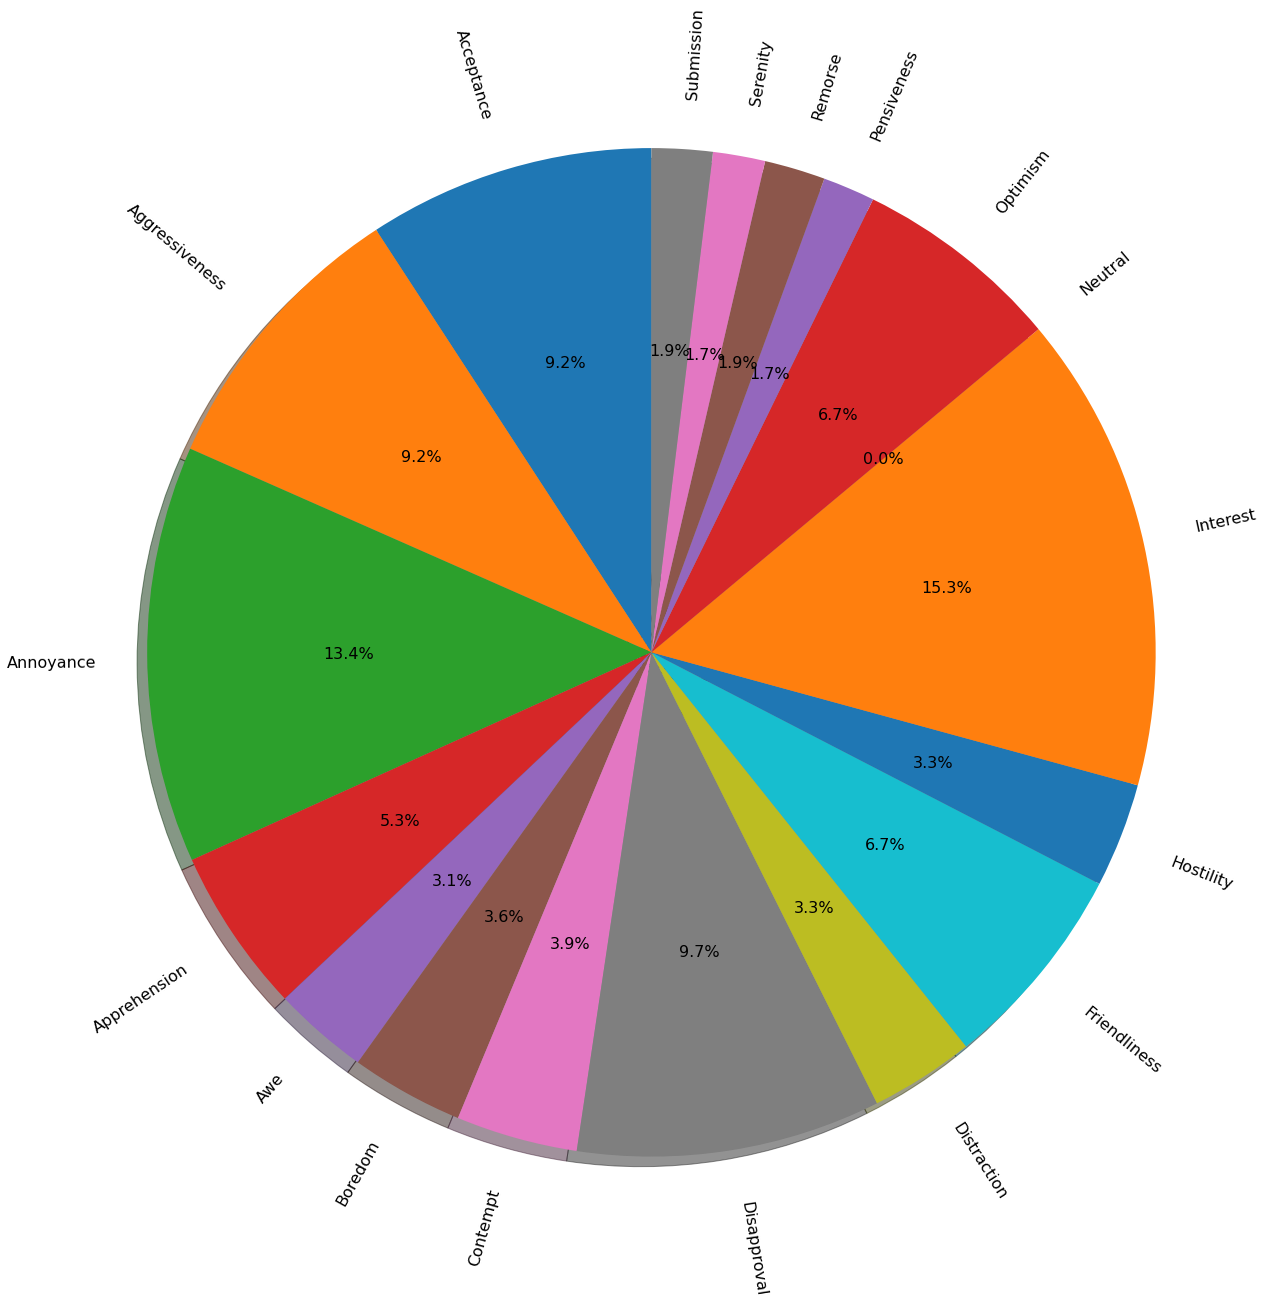

In [5]:
# Plot the total emotion counts.
# Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# Pie charts, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.pie(
    emotion_value_list,
    labels=emotion_list,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    rotatelabels=True,
)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('emotion_counts.png', bbox_inches='tight')

plt.show()

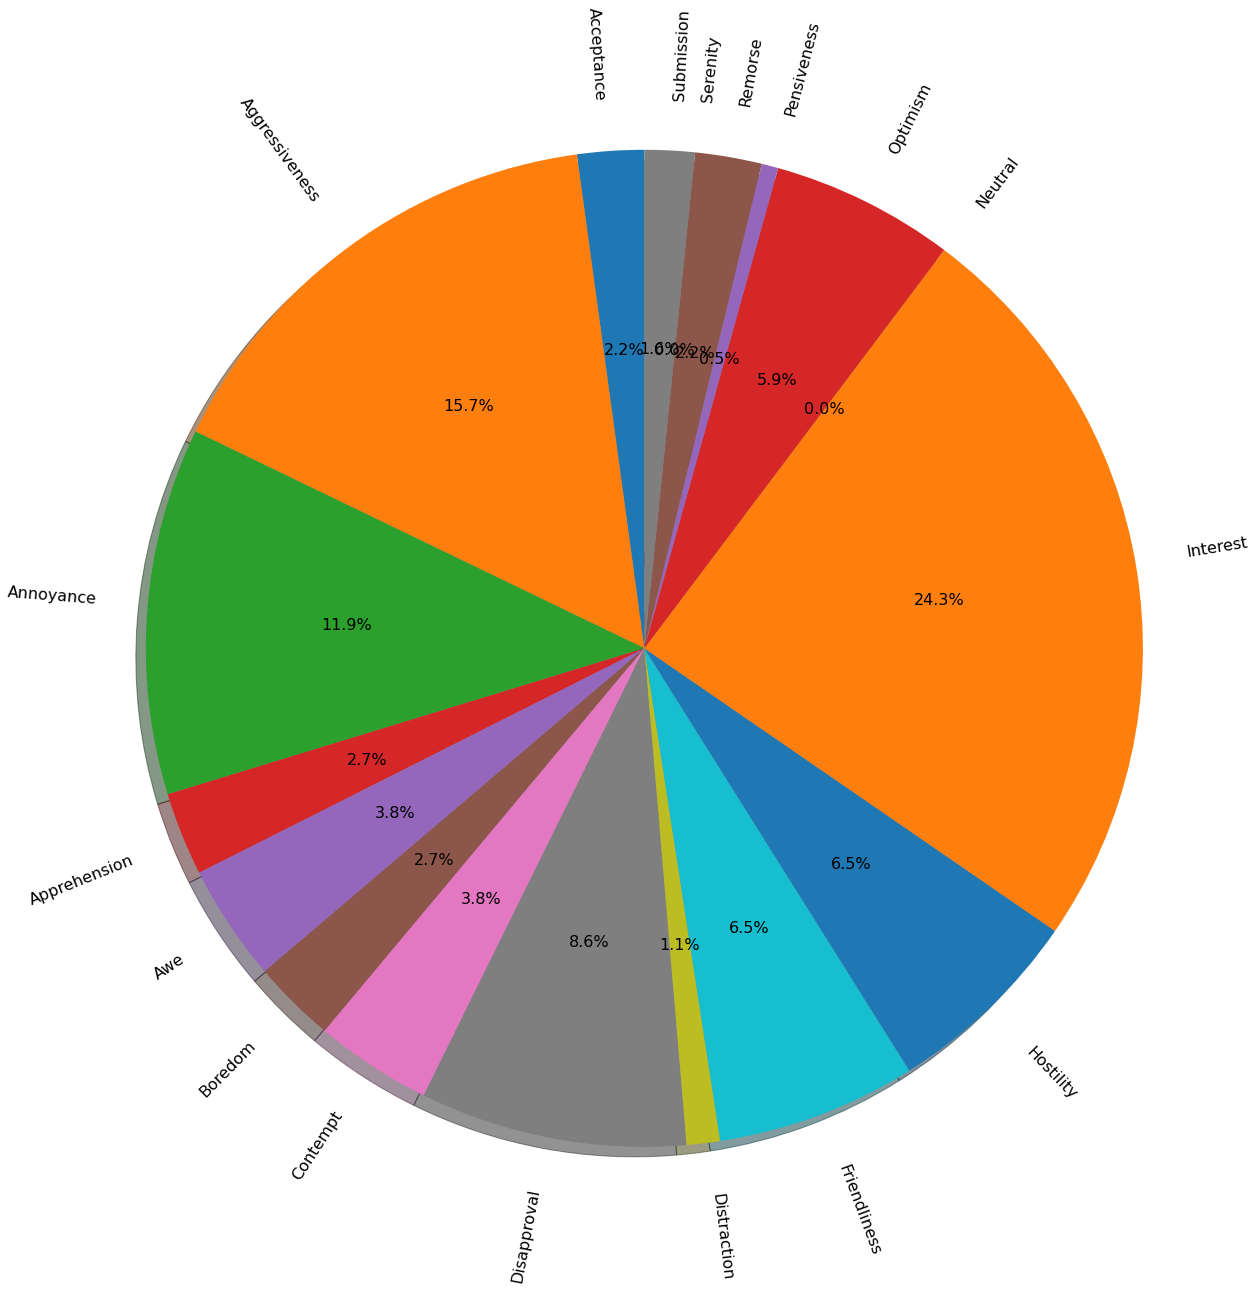

In [6]:
# Plot the total question emotion counts.
# Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# Pie charts, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.pie(
    q_emotion_value_list,
    labels=emotion_list,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    rotatelabels=True,
)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('q_emotion_counts.png', bbox_inches='tight')

plt.show()

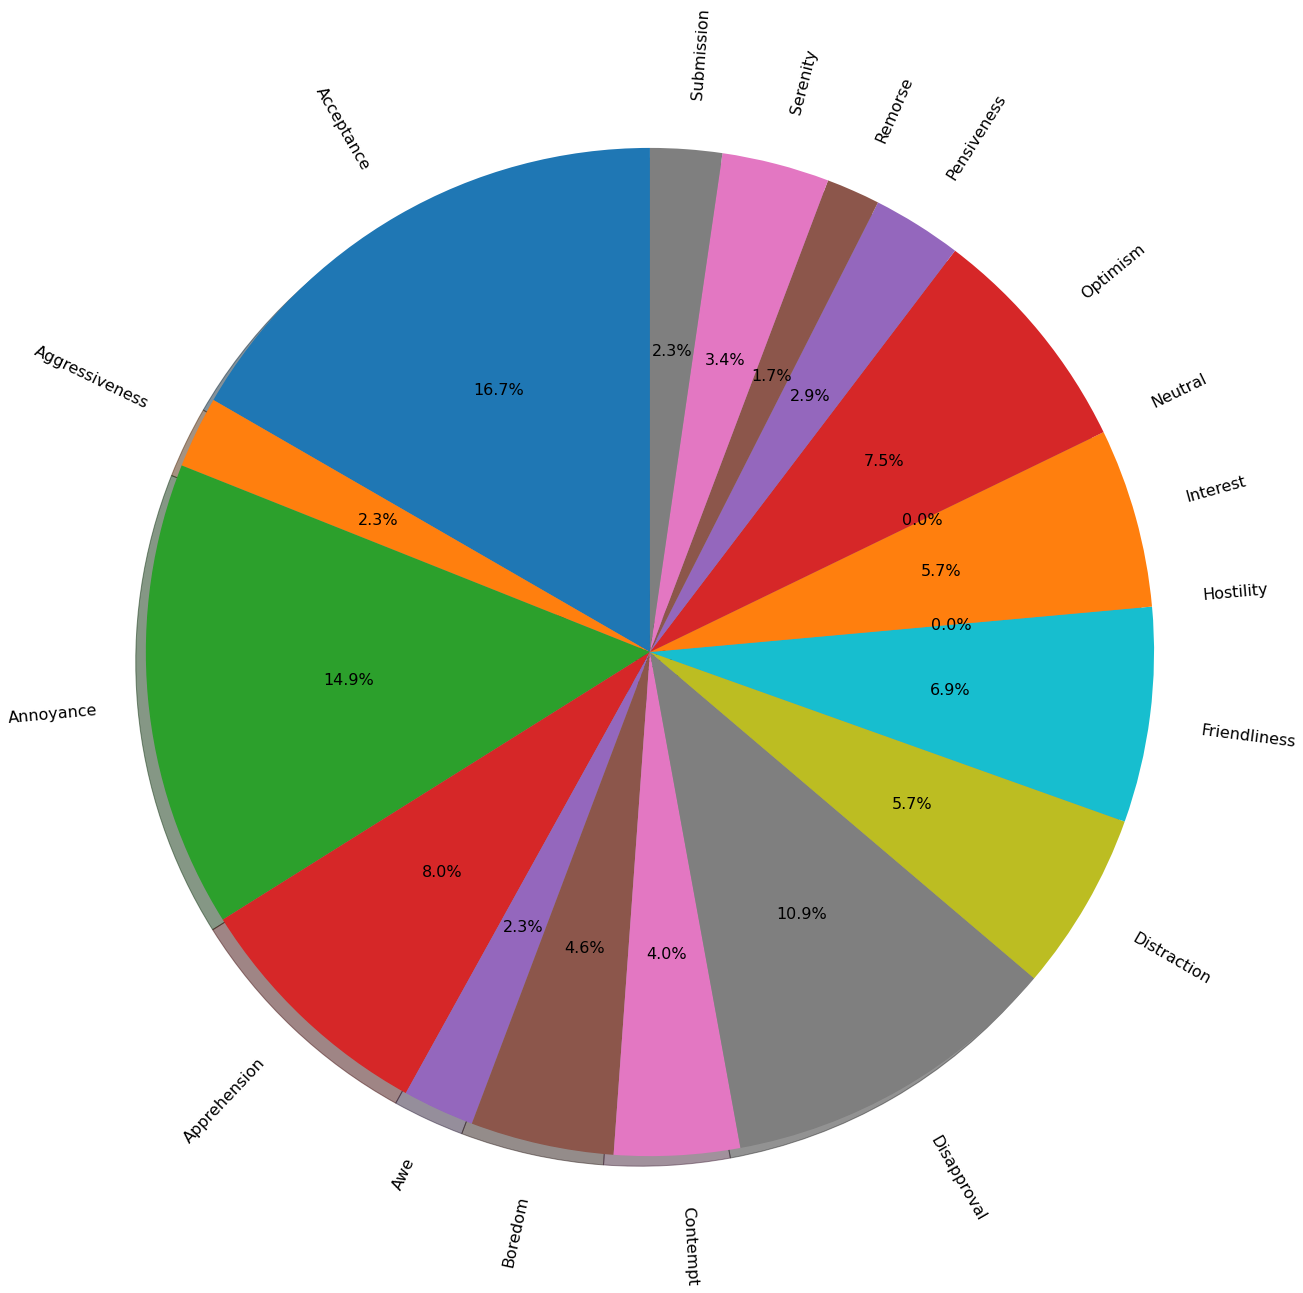

In [7]:
# Plot the total response emotion counts.
# Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# Pie charts, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.pie(
    r_emotion_value_list,
    labels=emotion_list,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    rotatelabels=True,
)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('r_emotion_counts.png', bbox_inches='tight')

plt.show()

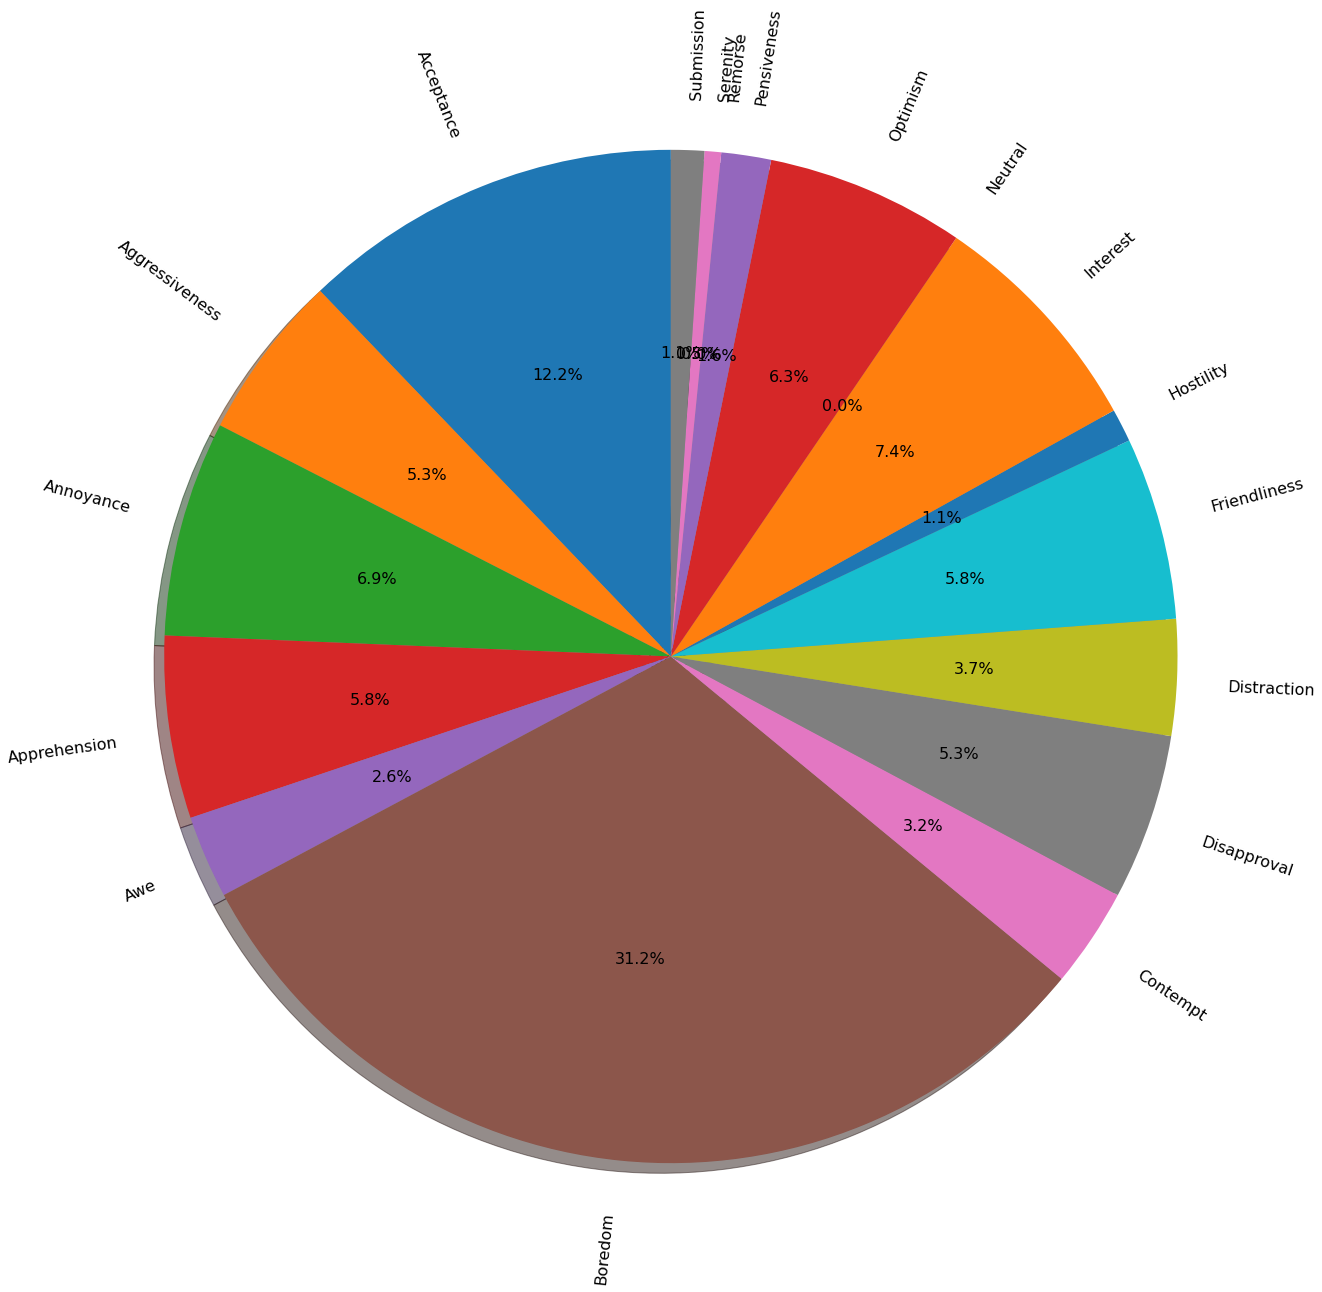

In [8]:
# Plot the total annotator emotion counts.
# Reference: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# Pie charts, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.pie(
    a_emotion_value_list,
    labels=emotion_list,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    rotatelabels=True,
)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('a_emotion_counts.png', bbox_inches='tight')

plt.show()

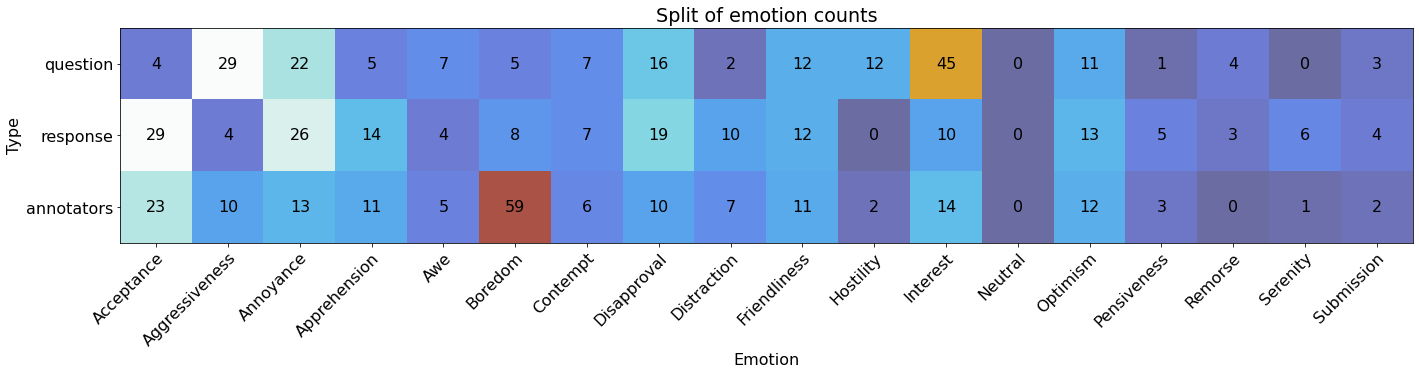

In [9]:
# Plot the emotions counts as a heatmap
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

types = ['question', 'response', 'annotators']

# Convert the dictionary to a numpy array
emotion_data = np.array([q_emotion_value_list, r_emotion_value_list, a_emotion_value_list])

# Create a heatmap
fig, ax = plt.subplots()
im = ax.imshow(emotion_data, cmap=cmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(emotion_list)))
ax.set_xticklabels(emotion_list)
ax.set_yticks(np.arange(len(types)))
ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over data dimensions and create text annotations.
for i in range(len(types)):
    for j in range(len(emotion_list)):
        text = ax.text(j, i, int(emotion_data[i, j]), ha='center', va='center')

ax.set_title('Split of emotion counts')
plt.ylabel('Type')
plt.xlabel('Emotion')
fig.tight_layout()
plt.savefig('emotion_heatmap.png', bbox_inches='tight')
plt.show()

In [10]:
# Get average number of words picked per emotion
emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

q_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

r_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}
q_totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}
r_totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

for value in merged_emotion_annotated_data[['q_emotion1', 'q_emotion1_text']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        length = len([word for word in value[1].split() if word != '[SEP]' and word != ''])
        emotions[value[0]] += length
        q_emotions[value[0]] += length
        totals[value[0]] += 1
        q_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['q_emotion2', 'q_emotion2_text']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        length = len([word for word in value[1].split() if word != '[SEP]' and word != ''])
        emotions[value[0]] += length
        q_emotions[value[0]] += length
        totals[value[0]] += 1
        q_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['r_emotion1', 'r_emotion1_text']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        length = len([word for word in value[1].split() if word != '[SEP]' and word != ''])
        emotions[value[0]] += length
        r_emotions[value[0]] += length
        totals[value[0]] += 1
        r_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['r_emotion2', 'r_emotion2_text']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        length = len([word for word in value[1].split() if word != '[SEP]' and word != ''])
        emotions[value[0]] += length
        r_emotions[value[0]] += length
        totals[value[0]] += 1
        r_totals[value[0]] += 1

emotion_value_list = list()
q_emotion_value_list = list()
r_emotion_value_list = list()

for emotion in emotion_list:
    if totals[emotion] != 0:
        emotion_value_list.append(emotions[emotion] / totals[emotion])
    else:
        emotion_value_list.append(0)
    
    if q_totals[emotion] != 0:
        q_emotion_value_list.append(q_emotions[emotion] / q_totals[emotion])
    else:
        q_emotion_value_list.append(0)
    
    if r_totals[emotion] != 0:
        r_emotion_value_list.append(r_emotions[emotion] / r_totals[emotion])
    else:
        r_emotion_value_list.append(0)

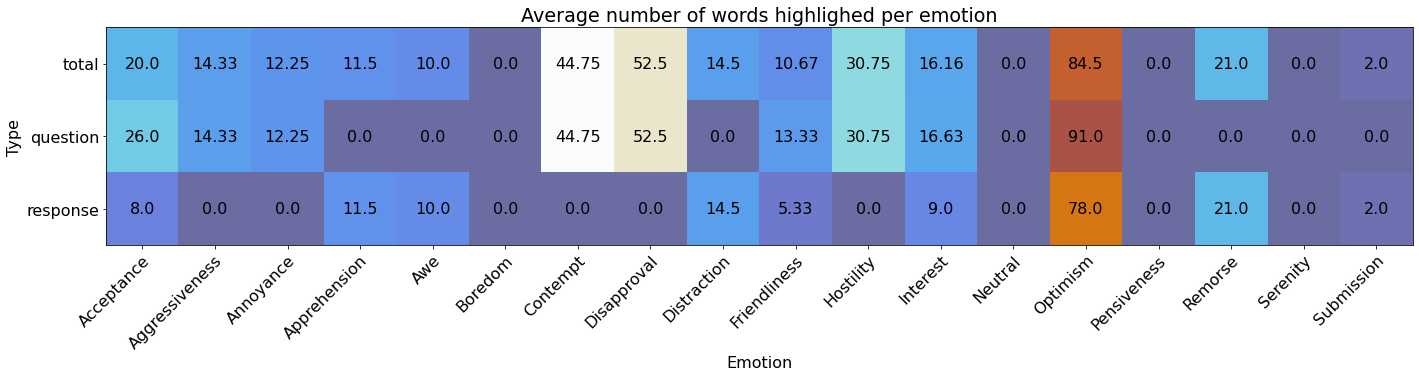

In [11]:
# Plot the per emotions word counts
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

types = ['total', 'question', 'response']

# Convert the dictionary to a numpy array
emotion_data = np.array([emotion_value_list, q_emotion_value_list, r_emotion_value_list])

# Create a heatmap
fig, ax = plt.subplots()
im = ax.imshow(emotion_data, cmap=cmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(emotion_list)))
ax.set_xticklabels(emotion_list)
ax.set_yticks(np.arange(len(types)))
ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over data dimensions and create text annotations.
for i in range(len(types)):
    for j in range(len(emotion_list)):
        text = ax.text(j, i, round(emotion_data[i, j], 2), ha='center', va='center')

ax.set_title('Average number of words highlighed per emotion')
plt.ylabel('Type')
plt.xlabel('Emotion')
fig.tight_layout()
plt.savefig('emotion_word_counts_heatmap.png', bbox_inches='tight')
plt.show()

In [12]:
# Average intensity per emotion
emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

q_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

r_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}
q_totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}
r_totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

for value in merged_emotion_annotated_data[['q_emotion1', 'q_emotion1_intensity']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        q_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        q_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['q_emotion2', 'q_emotion2_intensity']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        q_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        q_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['r_emotion1', 'r_emotion1_intensity']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        r_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        r_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['r_emotion2', 'r_emotion2_intensity']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        r_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        r_totals[value[0]] += 1

emotion_value_list = list()
q_emotion_value_list = list()
r_emotion_value_list = list()

for emotion in emotion_list:
    if totals[emotion] != 0:
        emotion_value_list.append(emotions[emotion] / totals[emotion])
    else:
        emotion_value_list.append(0)
    
    if q_totals[emotion] != 0:
        q_emotion_value_list.append(q_emotions[emotion] / q_totals[emotion])
    else:
        q_emotion_value_list.append(0)
    
    if r_totals[emotion] != 0:
        r_emotion_value_list.append(r_emotions[emotion] / r_totals[emotion])
    else:
        r_emotion_value_list.append(0)

emotion_intensity_value_list = emotion_value_list

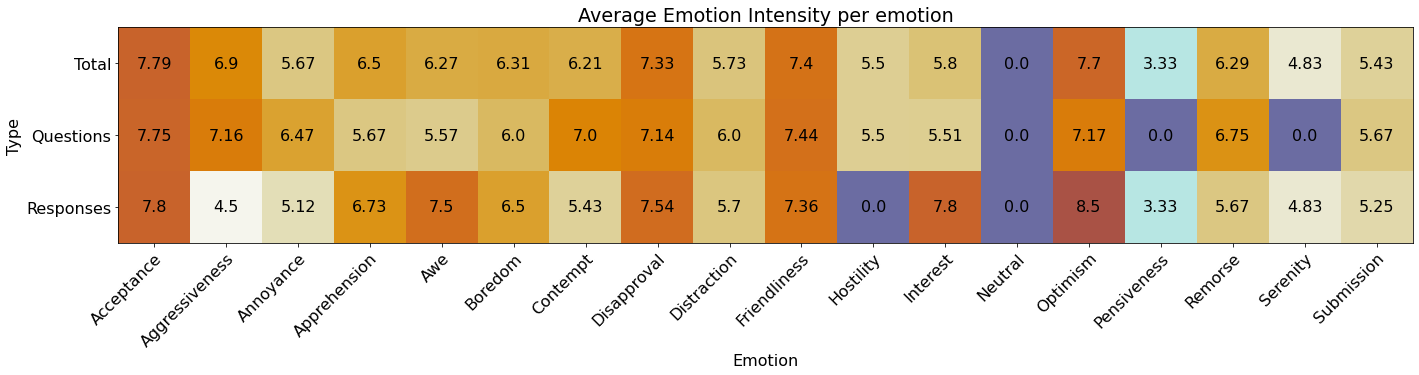

In [13]:
# Plot the per emotions intensity counts
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

types = ['Total', 'Questions', 'Responses']

# Convert the dictionary to a numpy array
emotion_intensity_data = np.array([emotion_value_list, q_emotion_value_list, r_emotion_value_list])

# Create a heatmap
fig, ax = plt.subplots()
im = ax.imshow(emotion_intensity_data, cmap=cmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(emotion_list)))
ax.set_xticklabels(emotion_list)
ax.set_yticks(np.arange(len(types)))
ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over data dimensions and create text annotations.
for i in range(len(types)):
    for j in range(len(emotion_list)):
        text = ax.text(j, i, round(emotion_intensity_data[i, j], 2), ha='center', va='center')

ax.set_title('Average Emotion Intensity per emotion')
plt.ylabel('Type')
plt.xlabel('Emotion')
fig.tight_layout()
plt.savefig('emotion_intensity_counts_heatmap.png', bbox_inches='tight')
plt.show()

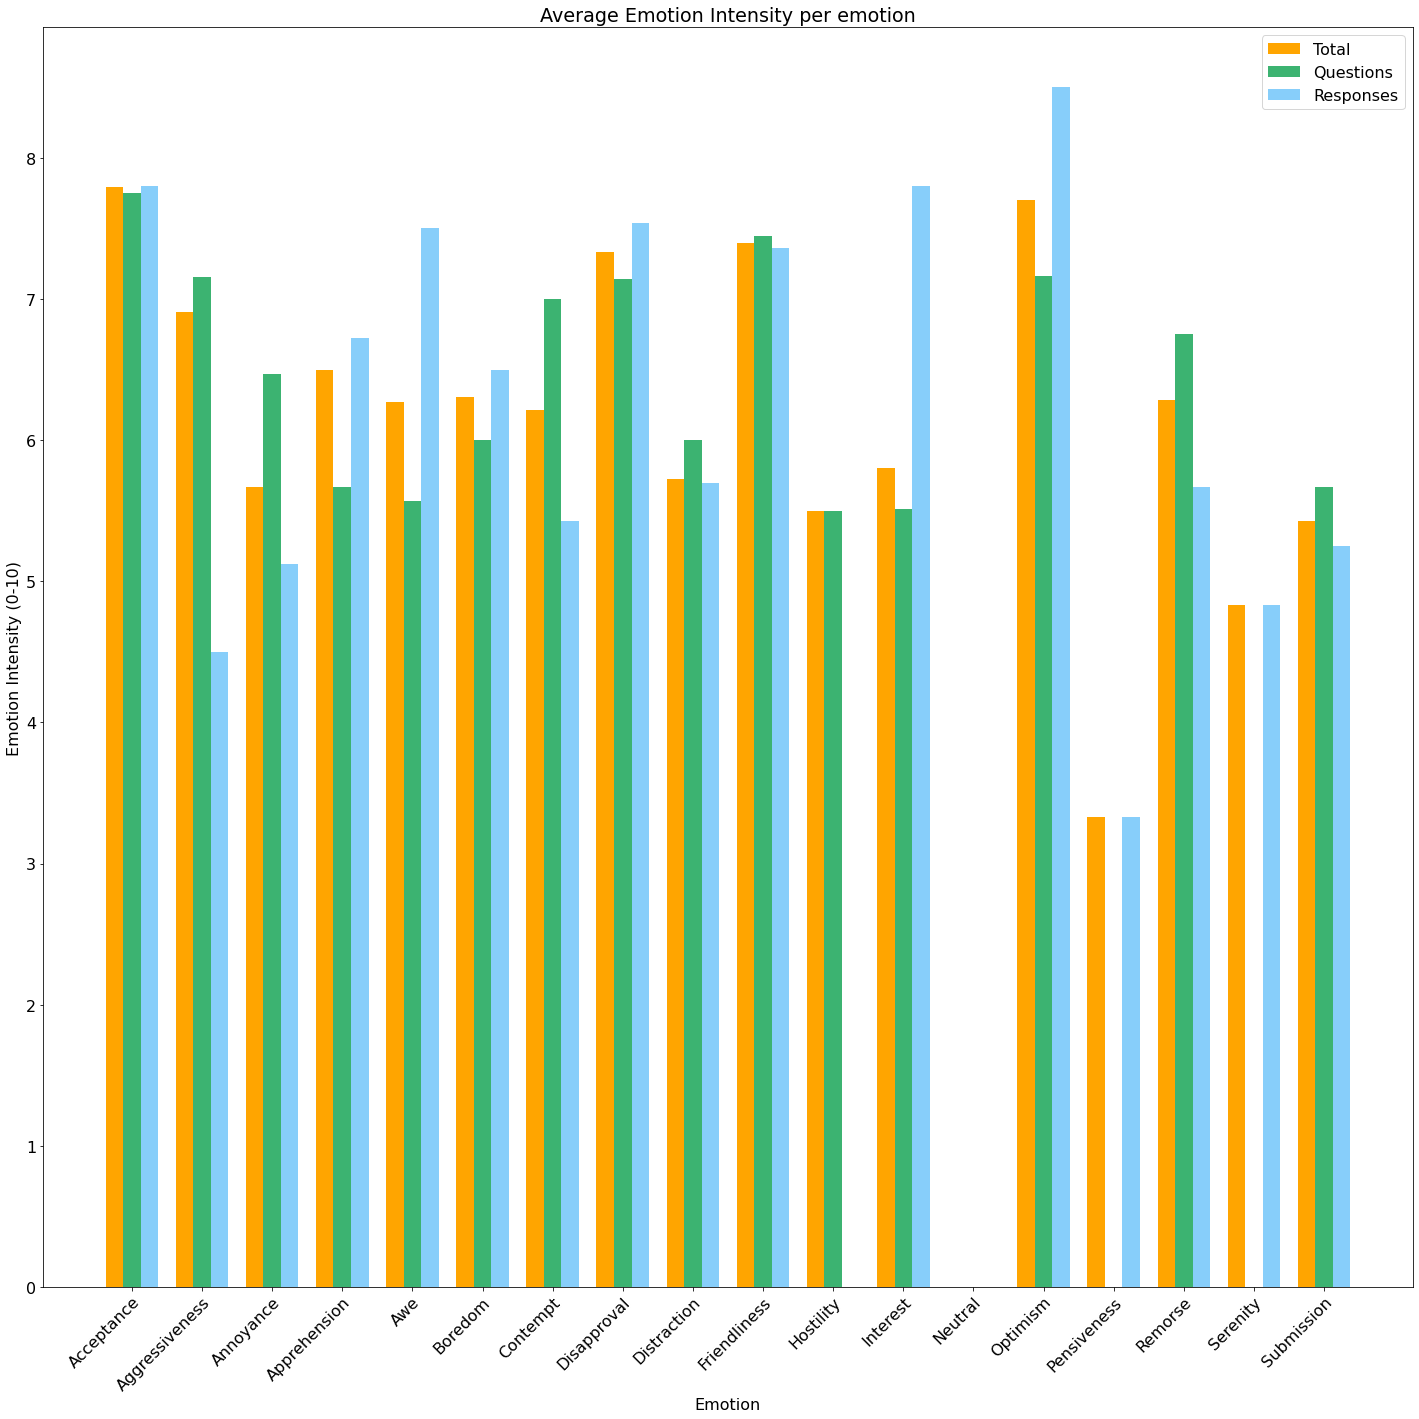

In [14]:
# Plot the per emotion intensity levels as a bar chart
bar_width = 0.25

# Create a bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(emotion_list)), emotion_intensity_data[0, :], width=bar_width, color='orange')
bar2 = ax.bar((np.arange(len(emotion_list)) + bar_width), emotion_intensity_data[1, :], width=bar_width, color='mediumseagreen')
bar3 = ax.bar((np.arange(len(emotion_list)) + (2 * bar_width)), emotion_intensity_data[2, :], width=bar_width, color='lightskyblue')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(emotion_list)) + bar_width)
ax.set_xticklabels(emotion_list)
# ax.set_yticks(np.arange(emotion_confidence_data.shape[0]))
# ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Set the legend
ax.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Questions', 'Responses'))

# Loop over data dimensions and create text annotations.
# for i in range(len(types)):
#     for j in range(len(emotion_list)):
#         text = ax.text(j, i, round(emotion_confidence_data[i, j], 2), ha='center', va='center')

ax.set_title('Average Emotion Intensity per emotion')
plt.ylabel('Emotion Intensity (0-10)')
plt.xlabel('Emotion')
fig.tight_layout()
plt.savefig('emotion_intensity_counts_bar.png', bbox_inches='tight')
plt.show()

In [15]:
# Average confidence per emotion
emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

q_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

r_emotions = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}
q_totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}
r_totals = {
    'Optimism': 0,
    'Serenity': 0,
    'Submission': 0,
    'Acceptance': 0,
    'Awe': 0,
    'Apprehension': 0,
    'Disapproval': 0,
    'Distraction': 0,
    'Remorse': 0,
    'Pensiveness': 0,
    'Contempt': 0,
    'Boredom': 0,
    'Aggressiveness': 0,
    'Annoyance': 0,
    'Interest': 0,
    'Friendliness': 0,
    'Hostility': 0,
    'Neutral': 0
}

for value in merged_emotion_annotated_data[['q_emotion1', 'q_emotion1_confidence']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        q_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        q_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['q_emotion2', 'q_emotion2_confidence']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        q_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        q_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['r_emotion1', 'r_emotion1_confidence']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        r_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        r_totals[value[0]] += 1

for value in merged_emotion_annotated_data[['r_emotion2', 'r_emotion2_confidence']].itertuples(index=False):
    if value[0] == value[0] and value[1] == value[1]:
        # This is not a NaN
        emotions[value[0]] += float(value[1])
        r_emotions[value[0]] += float(value[1])
        totals[value[0]] += 1
        r_totals[value[0]] += 1

emotion_value_list = list()
q_emotion_value_list = list()
r_emotion_value_list = list()

for emotion in emotion_list:
    if totals[emotion] != 0:
        emotion_value_list.append(emotions[emotion] / totals[emotion])
    else:
        emotion_value_list.append(0)
    
    if q_totals[emotion] != 0:
        q_emotion_value_list.append(q_emotions[emotion] / q_totals[emotion])
    else:
        q_emotion_value_list.append(0)
    
    if r_totals[emotion] != 0:
        r_emotion_value_list.append(r_emotions[emotion] / r_totals[emotion])
    else:
        r_emotion_value_list.append(0)

emotion_confidence_value_list = emotion_value_list

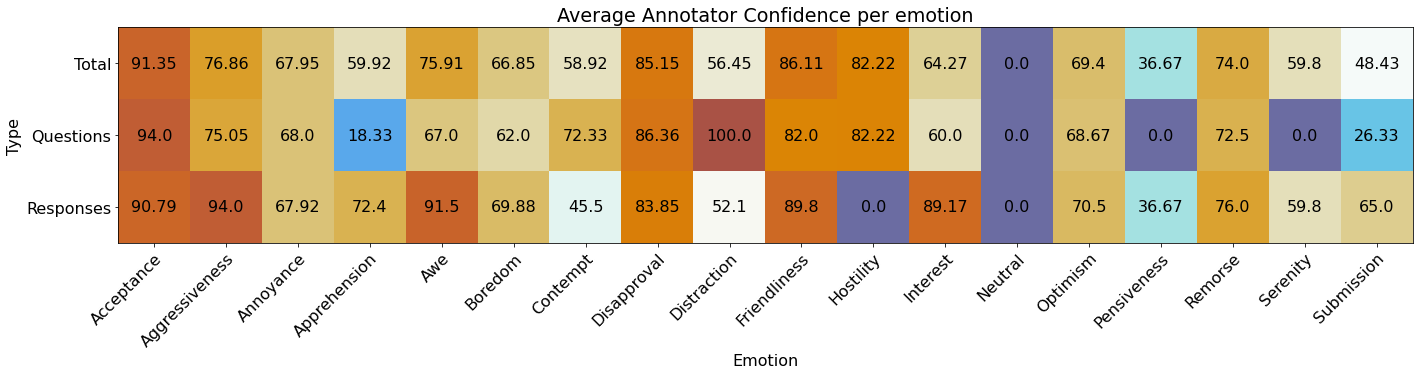

In [16]:
# Plot the per emotion confidence levels
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

types = ['Total', 'Questions', 'Responses']

# Convert the dictionary to a numpy array
emotion_confidence_data = np.array([emotion_value_list, q_emotion_value_list, r_emotion_value_list])

# Create a heatmap
fig, ax = plt.subplots()
im = ax.imshow(emotion_confidence_data, cmap=cmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(emotion_list)))
ax.set_xticklabels(emotion_list)
ax.set_yticks(np.arange(len(types)))
ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over data dimensions and create text annotations.
for i in range(len(types)):
    for j in range(len(emotion_list)):
        text = ax.text(j, i, round(emotion_confidence_data[i, j], 2), ha='center', va='center')

ax.set_title('Average Annotator Confidence per emotion')
plt.ylabel('Type')
plt.xlabel('Emotion')
fig.tight_layout()
plt.savefig('emotion_confidence_counts_heatmap.png', bbox_inches='tight')
plt.show()

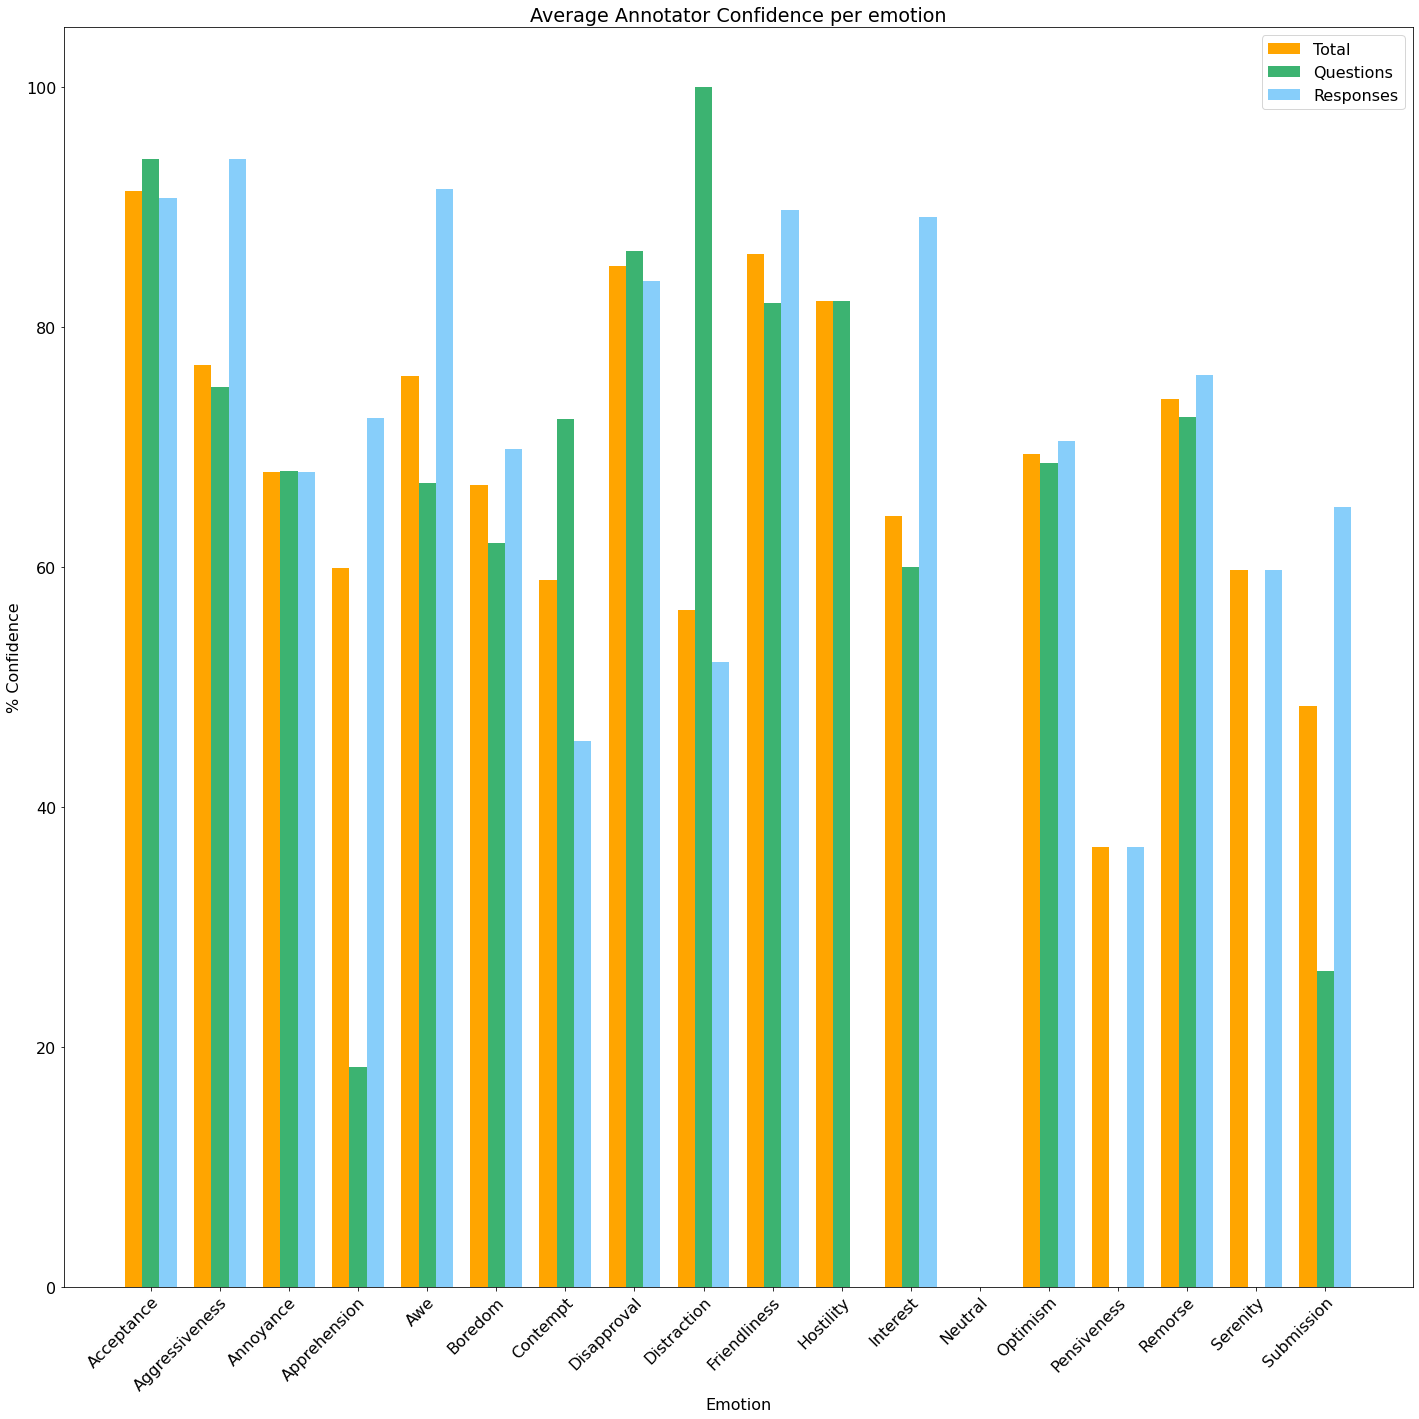

In [17]:
# Plot the per emotion confidence levels as a bar chart
bar_width = 0.25

# Create a bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(emotion_list)), emotion_confidence_data[0, :], width=bar_width, color='orange')
bar2 = ax.bar((np.arange(len(emotion_list)) + bar_width), emotion_confidence_data[1, :], width=bar_width, color='mediumseagreen')
bar3 = ax.bar((np.arange(len(emotion_list)) + (2 * bar_width)), emotion_confidence_data[2, :], width=bar_width, color='lightskyblue')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(emotion_list)) + bar_width)
ax.set_xticklabels(emotion_list)
# ax.set_yticks(np.arange(emotion_confidence_data.shape[0]))
# ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Set the legend
ax.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Questions', 'Responses'))

# Loop over data dimensions and create text annotations.
# for i in range(len(types)):
#     for j in range(len(emotion_list)):
#         text = ax.text(j, i, round(emotion_confidence_data[i, j], 2), ha='center', va='center')

ax.set_title('Average Annotator Confidence per emotion')
plt.ylabel('% Confidence')
plt.xlabel('Emotion')
fig.tight_layout()
plt.savefig('emotion_confidence_counts_bar.png', bbox_inches='tight')
plt.show()

In [18]:
# Extract the emotion intensity and emotion confidence levels
emotion_intensities_and_confidence_levels = pd.DataFrame({
    'intensity': pd.concat([
        merged_emotion_annotated_data['q_emotion1_intensity'],
        merged_emotion_annotated_data['q_emotion2_intensity'],
        merged_emotion_annotated_data['r_emotion1_intensity'],
        merged_emotion_annotated_data['r_emotion2_intensity']
    ]),
    'confidence': pd.concat([
        merged_emotion_annotated_data['q_emotion1_confidence'],
        merged_emotion_annotated_data['q_emotion2_confidence'],
        merged_emotion_annotated_data['r_emotion1_confidence'],
        merged_emotion_annotated_data['r_emotion2_confidence']
    ]),
})

emotion_intensities_and_confidence_levels.dropna(inplace=True)
emotion_intensities_and_confidence_levels.reset_index(inplace=True, drop=True)

pearson_correlation = emotion_intensities_and_confidence_levels.corr(method='pearson')
kendall_correlation = emotion_intensities_and_confidence_levels.corr(method='kendall')
spearman_correlation = emotion_intensities_and_confidence_levels.corr(method='spearman')

print('Pearson correlation coefficient:')
print(pearson_correlation)
print('\nKendall Tau correlation coefficient:')
print(kendall_correlation)
print('\nSpearman correlation coefficient:')
print(spearman_correlation)

Pearson correlation coefficient:
            intensity  confidence
intensity        1.00        0.55
confidence       0.55        1.00

Kendall Tau correlation coefficient:
            intensity  confidence
intensity        1.00        0.47
confidence       0.47        1.00

Spearman correlation coefficient:
            intensity  confidence
intensity        1.00        0.59
confidence       0.59        1.00


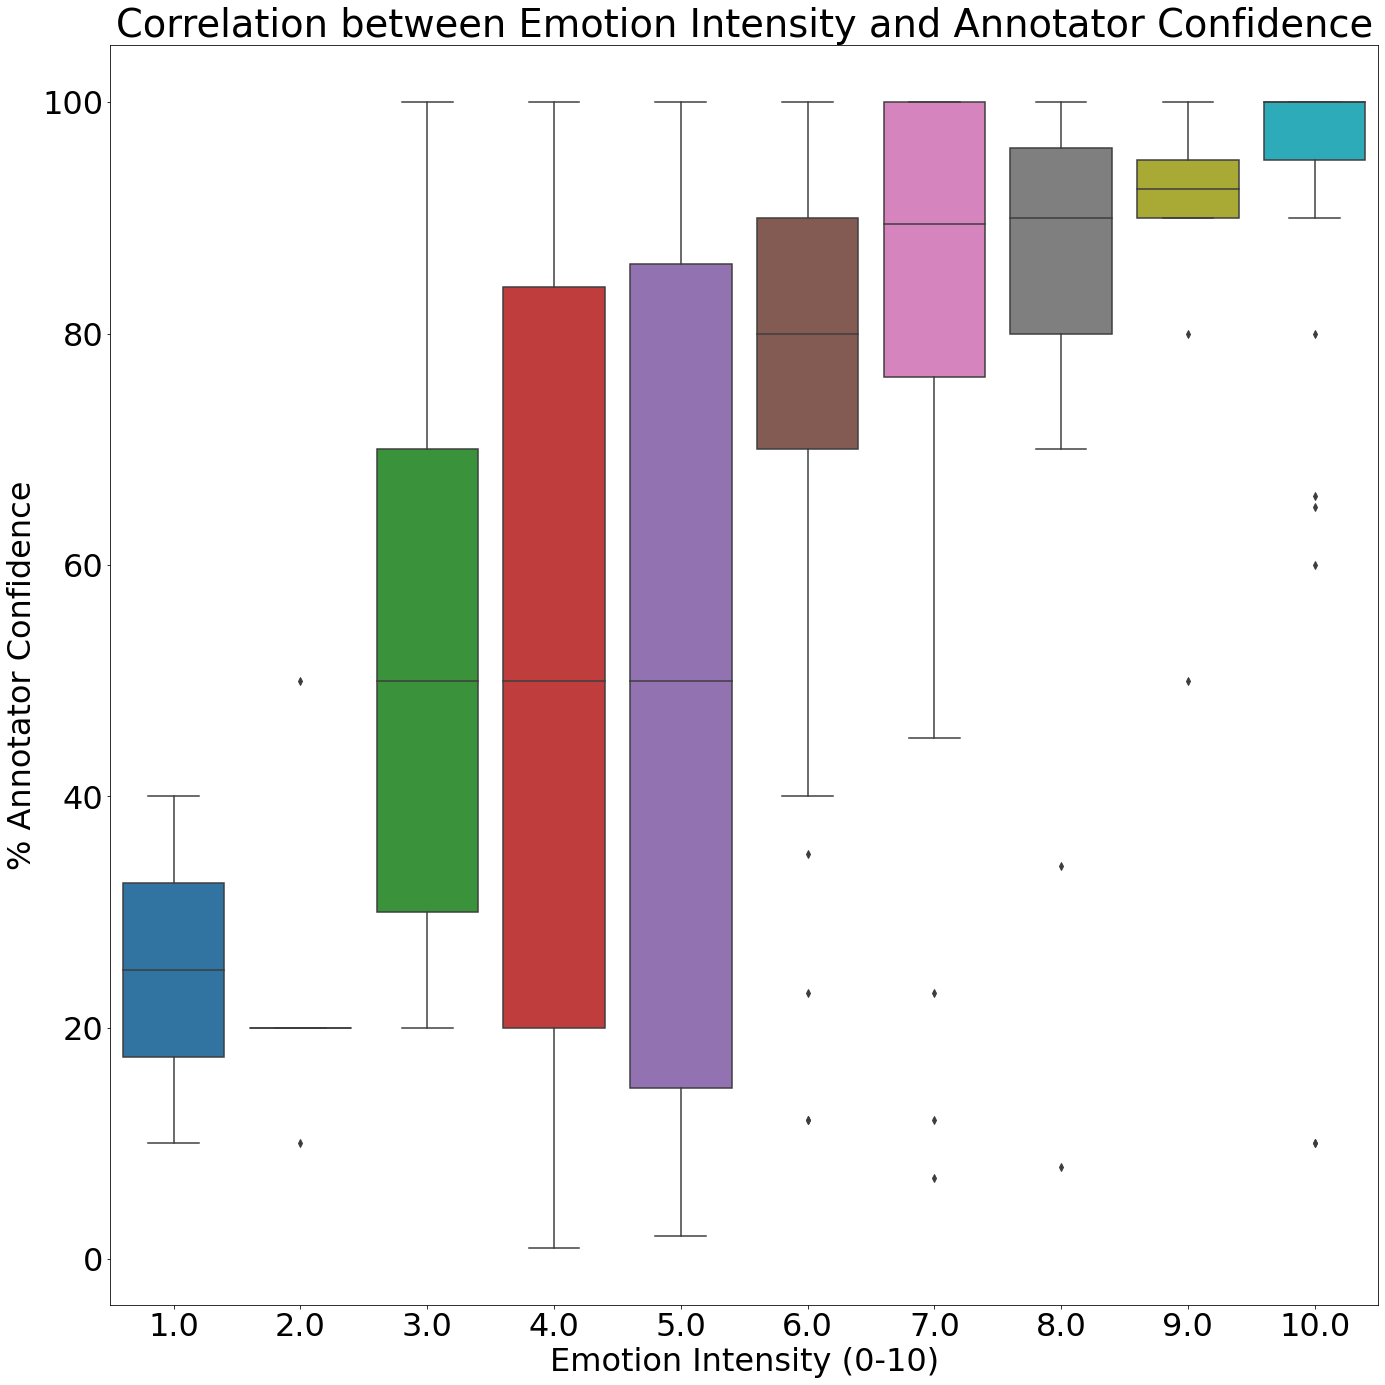

In [19]:
# Plot of correlation between intensity and confidence for questions and responses
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

# Use larger fonts
plt.rcParams.update({'font.size': 32})

# Create a box plot
fig, ax = plt.subplots()
sns.boxplot(x=emotion_intensities_and_confidence_levels['intensity'], y=emotion_intensities_and_confidence_levels['confidence'], ax=ax)

ax.set_title('Correlation between Emotion Intensity and Annotator Confidence')
plt.xlabel('Emotion Intensity (0-10)')
plt.ylabel('% Annotator Confidence')
fig.tight_layout()
plt.savefig('emotion_intensity_annotator_confidence_correlation.png', bbox_inches='tight')
plt.show()

In [20]:
# Extract the emotion intensity and emotion confidence levels
average_emotion_intensities_and_confidence_levels = pd.DataFrame({
    'intensity': emotion_intensity_value_list,
    'confidence': emotion_confidence_value_list,
})

pearson_correlation = average_emotion_intensities_and_confidence_levels.corr(method='pearson')
kendall_correlation = average_emotion_intensities_and_confidence_levels.corr(method='kendall')
spearman_correlation = average_emotion_intensities_and_confidence_levels.corr(method='spearman')

print('Pearson correlation coefficient:')
print(pearson_correlation)
print('\nKendall Tau correlation coefficient:')
print(kendall_correlation)
print('\nSpearman correlation coefficient:')
print(spearman_correlation)

Pearson correlation coefficient:
            intensity  confidence
intensity        1.00        0.91
confidence       0.91        1.00

Kendall Tau correlation coefficient:
            intensity  confidence
intensity        1.00        0.59
confidence       0.59        1.00

Spearman correlation coefficient:
            intensity  confidence
intensity        1.00        0.75
confidence       0.75        1.00


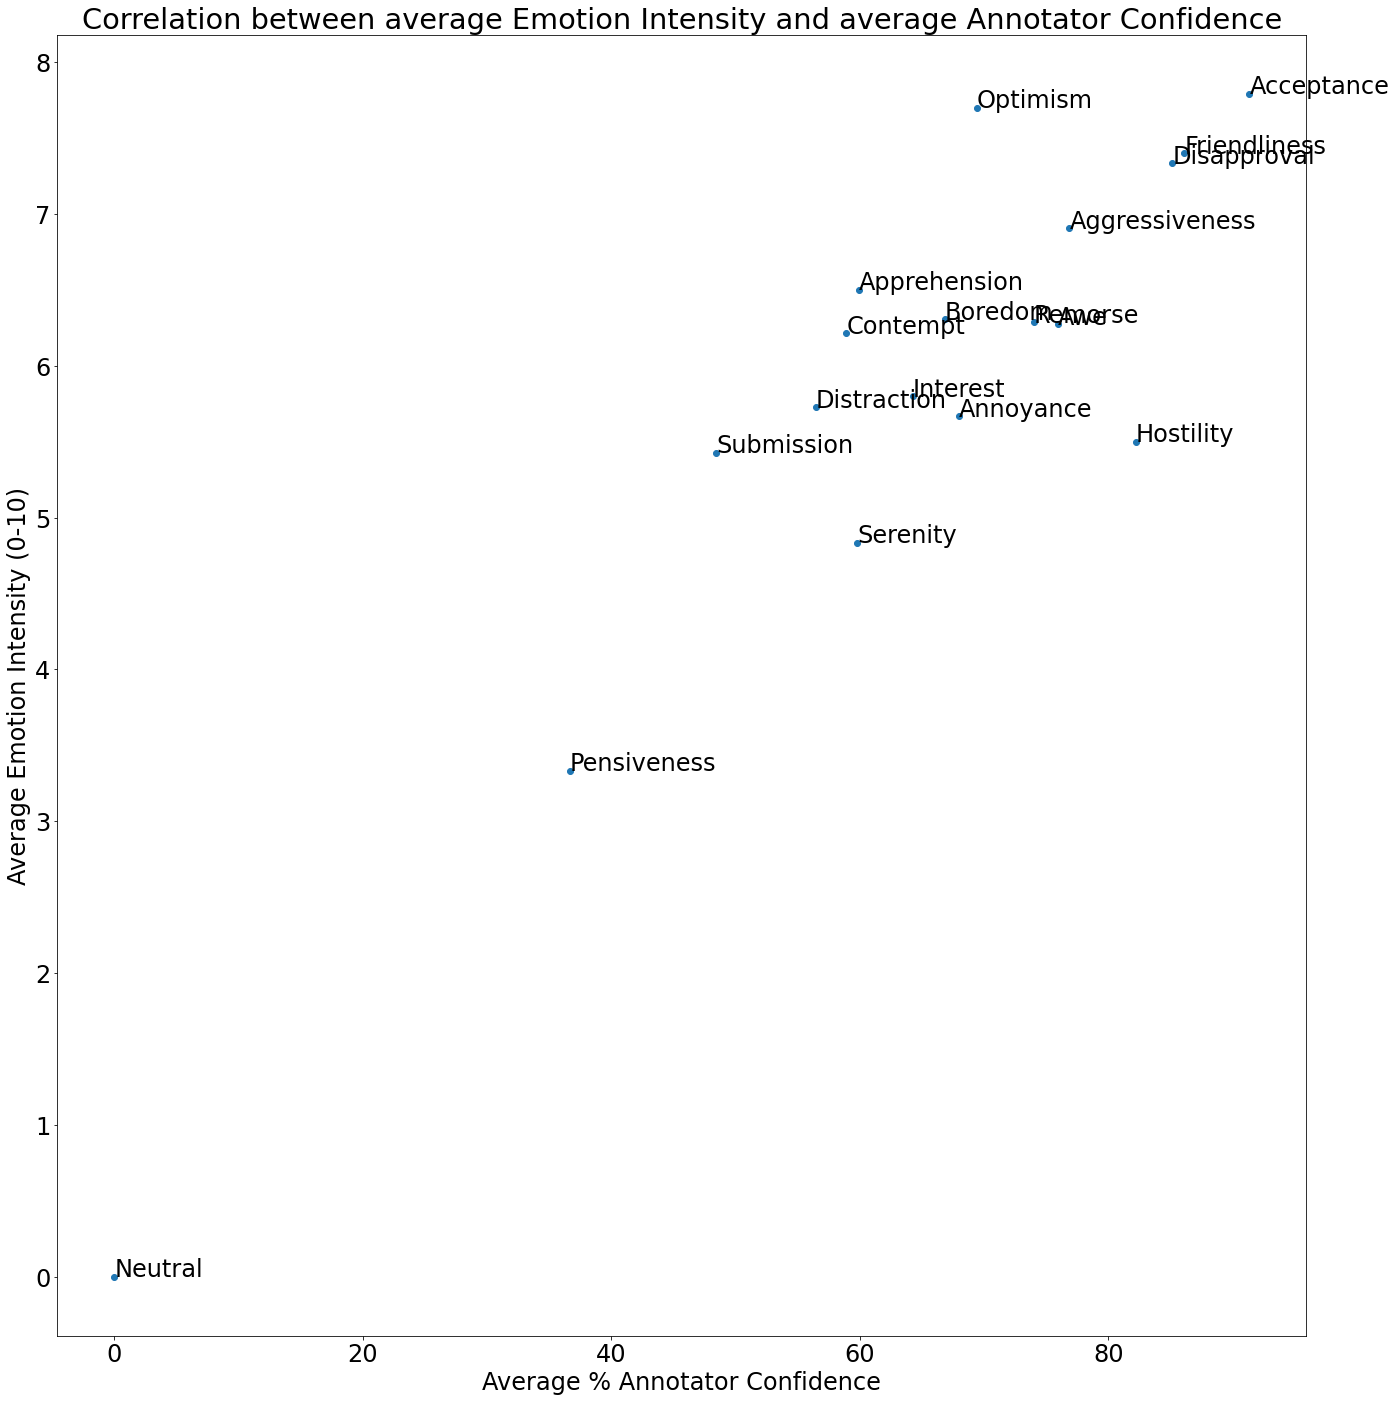

In [21]:
# Plot of correlation between average intensity and average confidence for questions
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

# Use a smaller font
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(emotion_confidence_value_list, emotion_intensity_value_list, cmap=cmap)

# Annotate each data point
for index, emotion in enumerate(emotion_list):
    ax.annotate(emotion, (emotion_confidence_value_list[index], emotion_intensity_value_list[index]))

ax.set_title('Correlation between average Emotion Intensity and average Annotator Confidence')
plt.xlabel('Average % Annotator Confidence')
plt.ylabel('Average Emotion Intensity (0-10)')
fig.tight_layout()
plt.savefig('average_emotion_intensity_confidence_correlation.png', bbox_inches='tight')
plt.show()

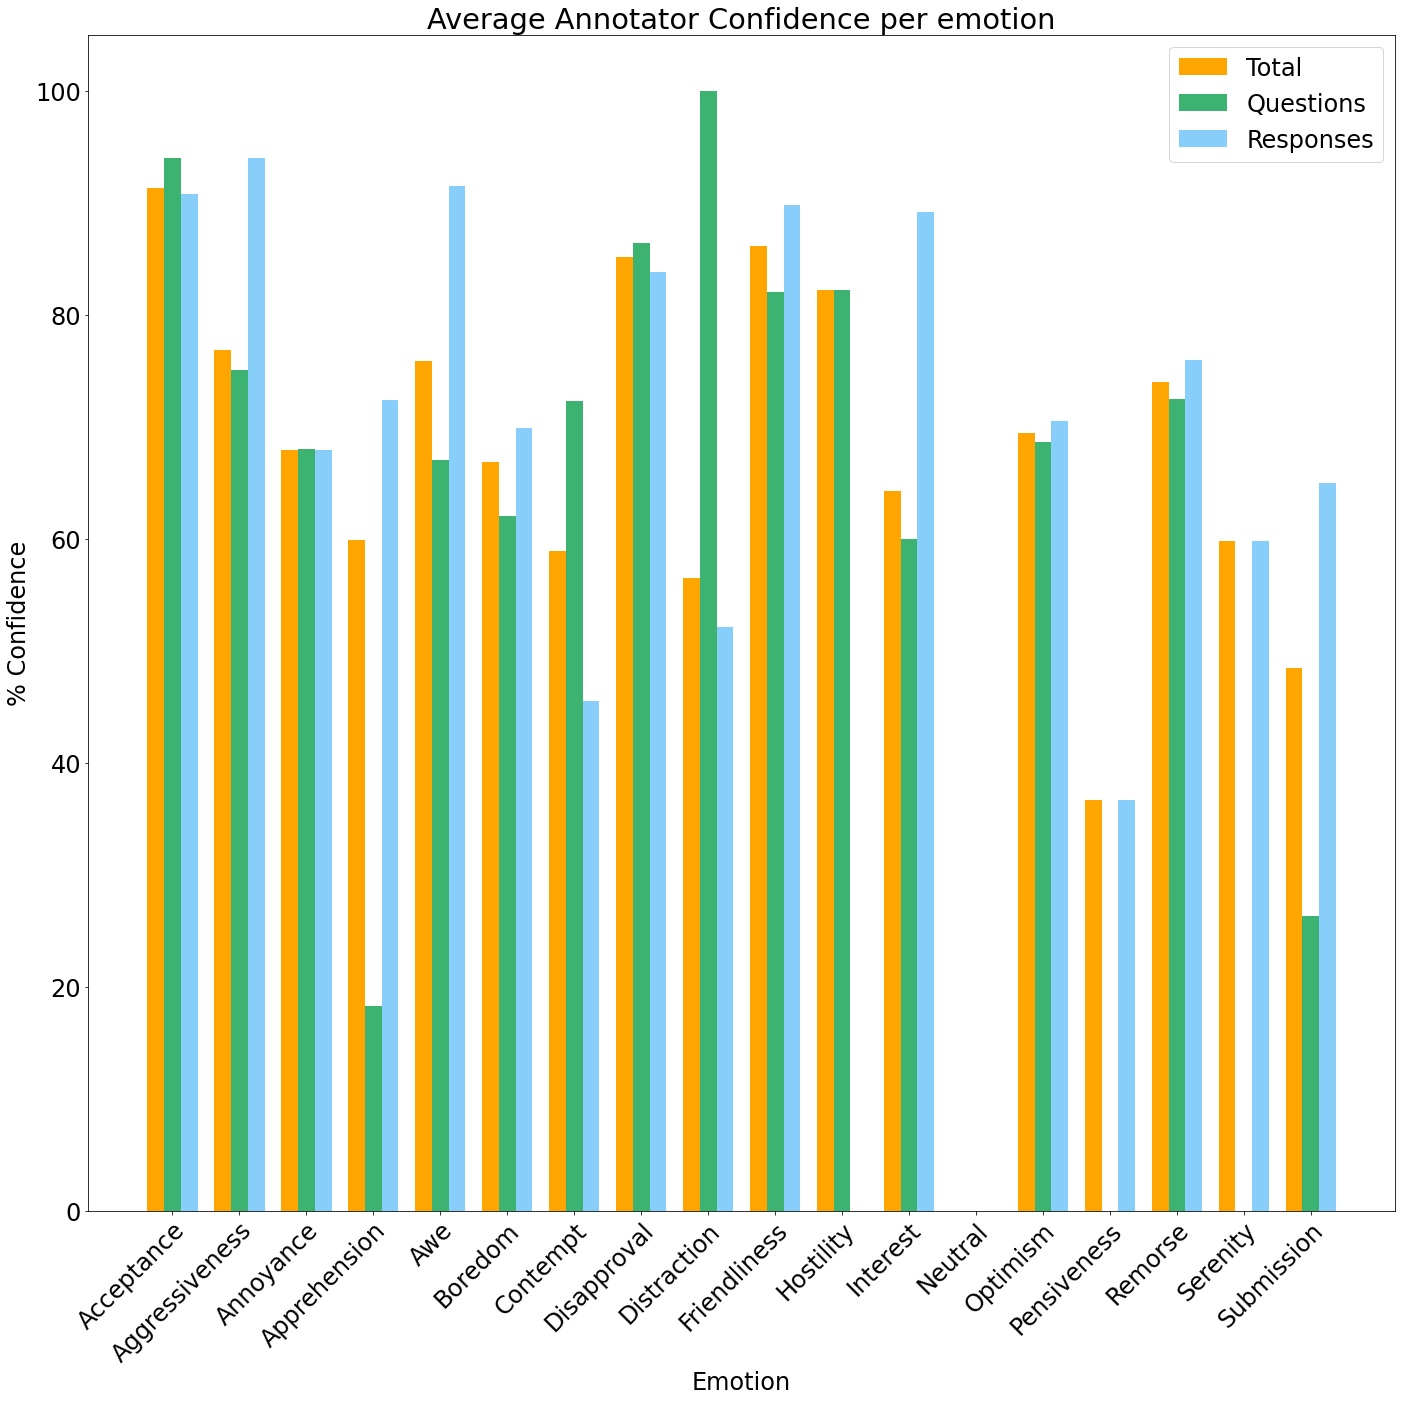

In [22]:
# Plot the per emotion confidence levels as a bar chart
bar_width = 0.25

# Create a bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(emotion_list)), emotion_confidence_data[0, :], width=bar_width, color='orange')
bar2 = ax.bar((np.arange(len(emotion_list)) + bar_width), emotion_confidence_data[1, :], width=bar_width, color='mediumseagreen')
bar3 = ax.bar((np.arange(len(emotion_list)) + (2 * bar_width)), emotion_confidence_data[2, :], width=bar_width, color='lightskyblue')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(emotion_list)) + bar_width)
ax.set_xticklabels(emotion_list)
# ax.set_yticks(np.arange(emotion_confidence_data.shape[0]))
# ax.set_yticklabels(types)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Set the legend
ax.legend((bar1[0], bar2[0], bar3[0]), ('Total', 'Questions', 'Responses'))

# Loop over data dimensions and create text annotations.
# for i in range(len(types)):
#     for j in range(len(emotion_list)):
#         text = ax.text(j, i, round(emotion_confidence_data[i, j], 2), ha='center', va='center')

ax.set_title('Average Annotator Confidence per emotion')
plt.ylabel('% Confidence')
plt.xlabel('Emotion')
fig.tight_layout()
plt.savefig('emotion_confidence_counts_bar.png', bbox_inches='tight')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

plutchik_emotions = [
        'Acceptance',
        'Aggressiveness',
        'Annoyance',
        'Apprehension',
        'Awe',
        'Boredom',
        'Contempt',
        'Disapproval',
        'Distraction',
        'Friendliness',
        'Hostility',
        'Interest',
        'Optimism',
        'Pensiveness',
        'Remorse',
        'Serenity',
        'Submission',
]

le = LabelEncoder()
le.fit(plutchik_emotions)
y = le.transform(merged_emotion_annotated_data['q_emotion1'].tolist())
x = list(range(len(y)))

/tmp/ipykernel_2855/3131931104.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(le.classes_)


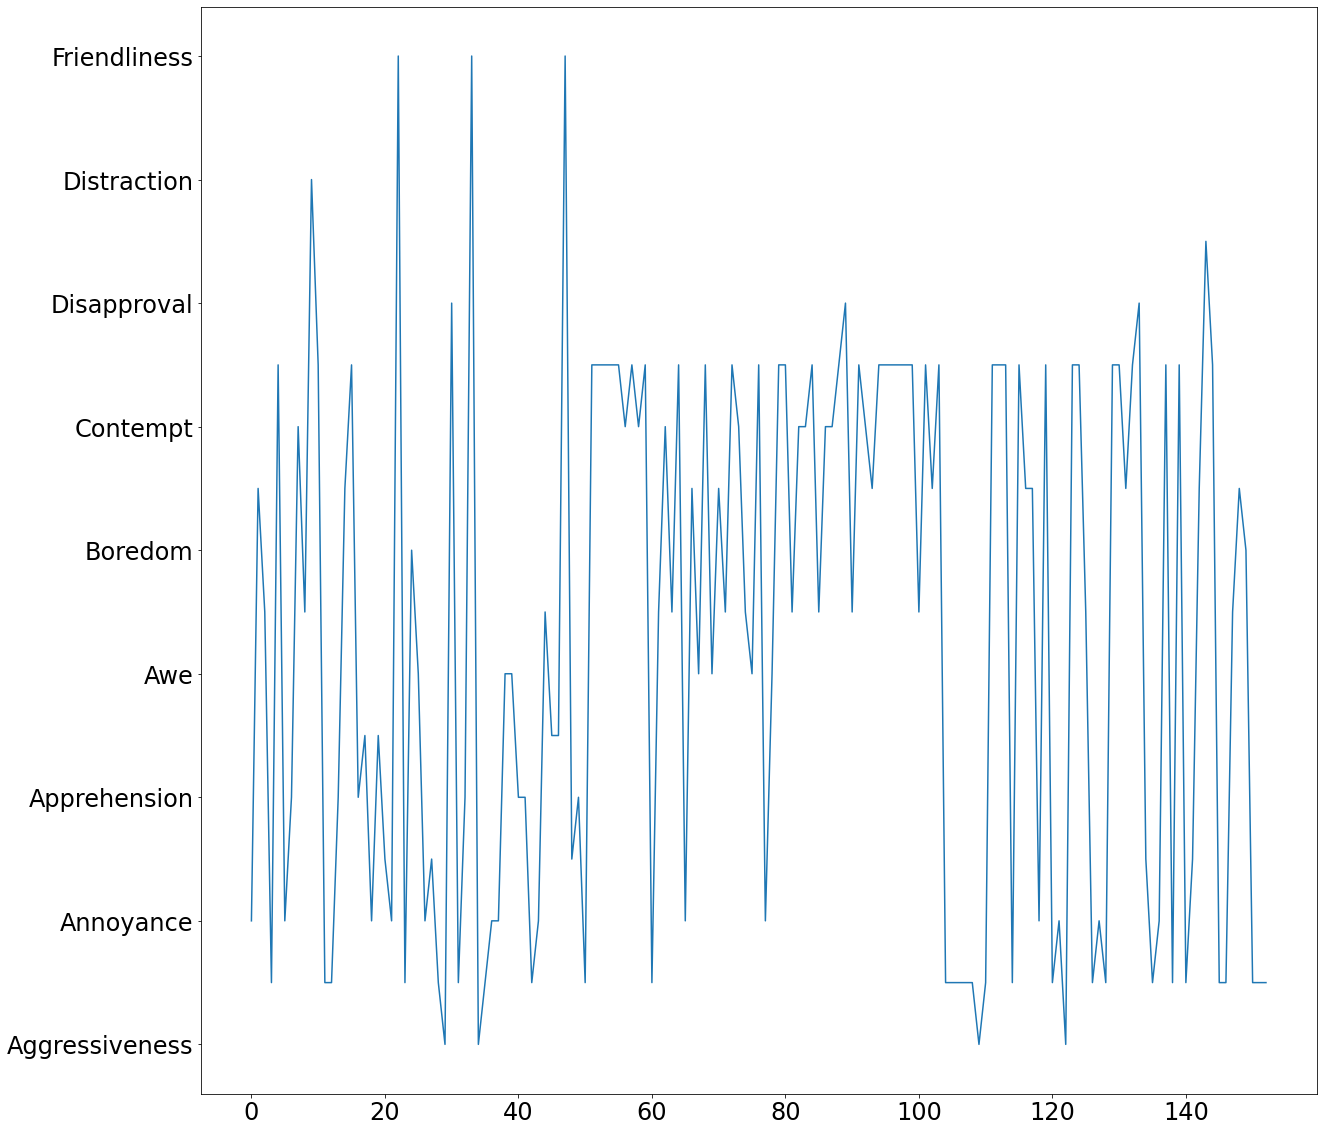

In [24]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_yticklabels(le.classes_)
plt.show()